# Imaging

## 11/14/2023

<a href="?print-pdf">print view</a>

<a href="bioimaging.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

<img width="25%" style="float: left; padding-right: 1em" src="http://t3.gstatic.com/images?q=tbn:ANd9GcRURiZVhRuxkPIU3h5yyUaAt7dX7Bro_aup-aPRjW7j10J5jWuS">

# Images


Images are composed of *pixels* (pix - picture, el - element).

In a grayscale image the pixel contains the intensity. Depending on the image format this may range from 0-1, 0-255, or be any floating point number.

In a color image a pixel is (usually) a triple (red,green,blue) of color values where each color intensity ranges from 0-255 (24-bit color).


In [2]:
%%html
<div id="imcol" style="width: 500px"></div>
<script>

    var divid = '#imcol';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which contains the most information?",
        answers: ['Gray','Color'],
		extra: ['A grayscale image with floating point pixels', 'A color image where pixel values range from 0 to 255'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# A slightly irrelevant aside
### Or, how to count with 16 fingers

It is very common for RGB color values to be represented in hexadecimal (e.g., HTML).

Hexadecimal number are usually indicated with a `0x` or `#` prefix.

In hexadecimal, each digit can take one of 16 values (as opposed to 10).  This means that each color can be represented with two digits (16\*16 = 256)

https://www.youtube.com/watch?v=ffB0Je-xjKg

<table>
<thead><th>Hex</th><th>Dec</th></thead>
<tr><td>A</td><td>10</td></tr>
<tr><td>B</td><td>11</td></tr>
<tr><td>C</td><td>12</td></tr>
<tr><td>D</td><td>13</td></tr>
<tr><td>E</td><td>14</td></tr>
<tr><td>F</td><td>15</td></tr>
</table>

In [3]:
%%html
<div id="hex1" style="width: 500px"></div>
<script>

    var divid = '#hex1';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the decimal value of 0x1F?",
		answers: ['11','16','17','31','32'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [4]:
%%html
<div id="hex2" style="width: 500px"></div>
<script>

    var divid = '#hex2';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the decimal value of 0xfe?",
		answers: ['15','32','127','254','255'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [5]:
%%html
<div id="hex3" style="width: 500px"></div>
<script>

    var divid = '#hex3';
	jQuery(divid).asker({
	    id: divid,
	    question: "What color is #ff00ff?",
		answers: ['green','cyan','yellow','magenta','I failed art'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Answers

In [6]:
print(0x1f, 0xfe)

31 254


`<div style="color: #ff00ff">Hello</div>`
<div style="color: #ff00ff">Hello</div>


# PIL - The Python Image Library

[documentation](http://effbot.org/imagingbook/pil-index.htm)

The Python Imaging Library provides the ability to read, write an manipulate images in all the common formats.  Some key modules:

 * PIL.Image - primary Image object
 * PIL.ImageChops - channel operations, for blending two images
 * PIL.ImageEnhance - enhance your photos (sharpness, contrast, ...)
 * PIL.ImageFilter - filters (blur, smooth, sharpen, ...)
 * PIL.ImageOps - assorted operations (resizing, equalize, autocontrast, ...)
 * PIL.ImageStat - statistics on image (min, max, ...)


# History

Despite being a popular package, PIL development stopped in 2011 with no new releases since 2009.

**Pillow** is a fork of PIL that is fully backwards compatible and updated (and is what you are actually using rather than the original PIL).

https://python-pillow.org

# Setup...

In [7]:
!wget http://bits.csb.pitt.edu/images/image1.tif

--2023-10-30 20:41:51--  http://bits.csb.pitt.edu/images/image1.tif
Resolving bits.csb.pitt.edu (bits.csb.pitt.edu)... 136.142.4.139
Connecting to bits.csb.pitt.edu (bits.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 921814 (900K) [image/tiff]
Saving to: ‘image1.tif’

image1.tif          100%[===================>] 900.21K  --.-KB/s    in 0.01s   

2023-10-30 20:41:51 (60.4 MB/s) - ‘image1.tif’ saved [921814/921814]



In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

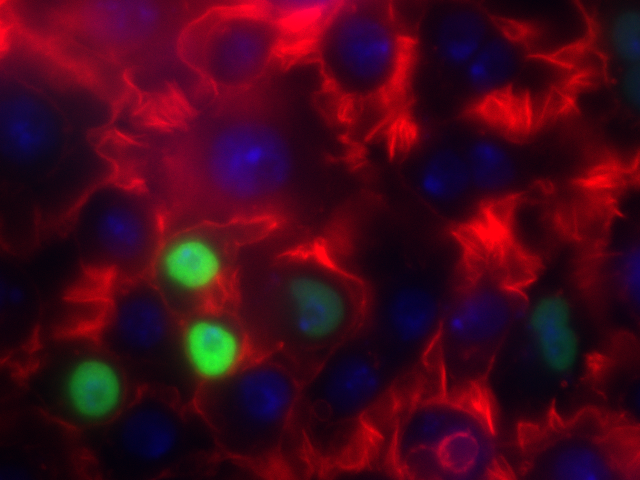

In [9]:
from PIL import Image
im = Image.open('image1.tif')
im

<font color="red">Actin</font> 
<font color="green">HSP27</font>
<font color="blue">DAPI</font>

# Image Methods

PIL refers to the different color channels as *bands*.

In [10]:
im.getbands()

('R', 'G', 'B')

You can split a color image into it's separate bands.

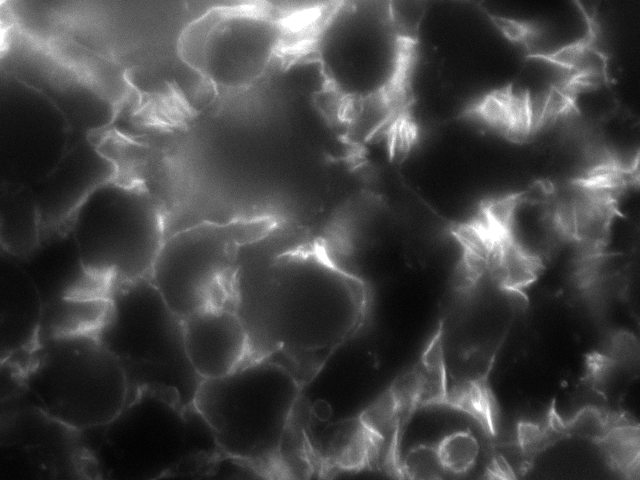

In [11]:
(r,g,b) = im.split()
r

## Green 

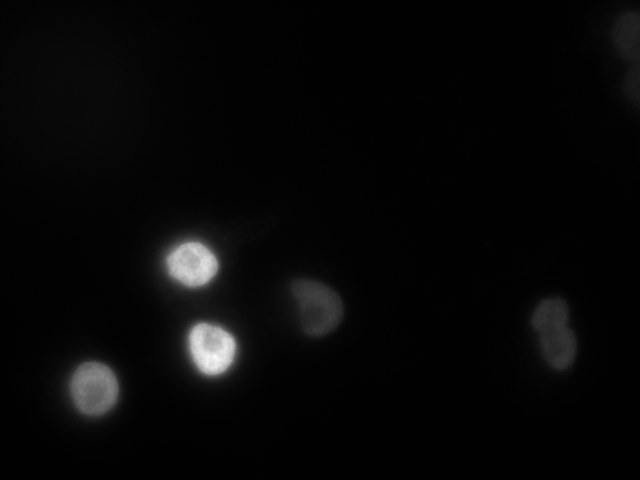

In [12]:
g

# Blue

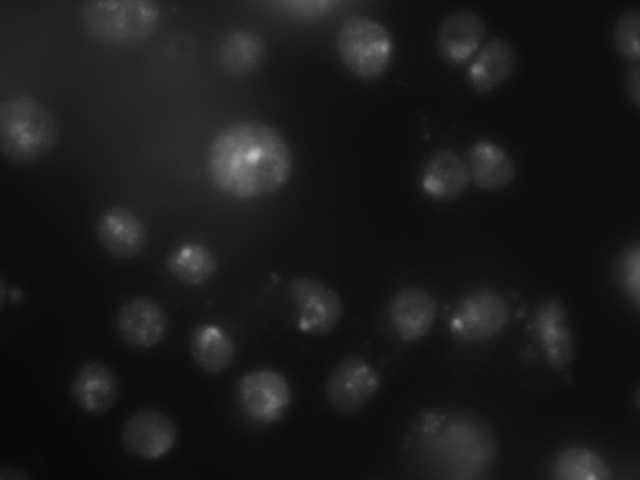

In [13]:
b

**Image analysis is usually done on a single channel** Why?

# Converting Image Types

We can convert to grayscale ('L' - luminance)

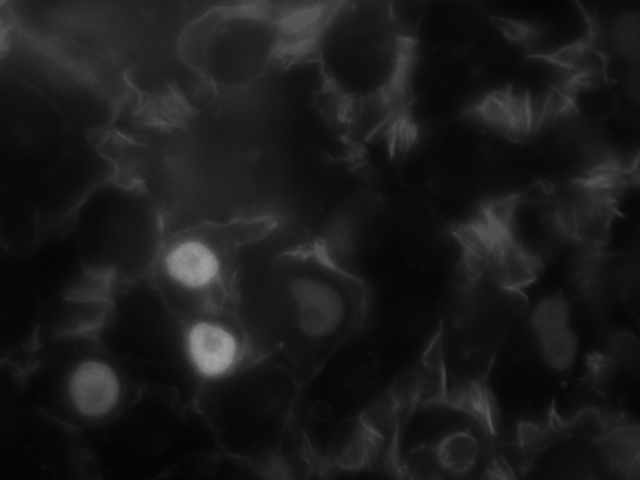

In [14]:
grey = im.convert('L')
grey

# Getting Pixels

In [15]:
im.size

(640, 480)

In [16]:
im.getpixel((320,240))

(159, 3, 18)

# Setting Pixels

To get/set pixels directly, first load the pixel map of an image.

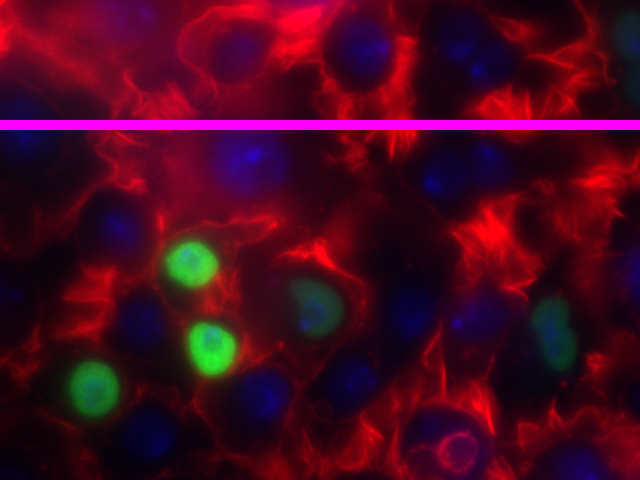

In [17]:
cp = im.copy()
pixels = cp.load()

for i in range(cp.size[0]):
    for j in range(120,130):
        pixels[i,j] = (255,0,255)

cp

# Getting all the pixels 

Can convert to `numpy` array - first dimension (rows) will be y-axis

In [18]:
np.array(im).shape

(480, 640, 3)

In [19]:
np.array(im)[240,320]

array([159,   3,  18], dtype=uint8)

Can get all the pixels in a flat list

In [20]:
list(im.getdata())

[(243, 3, 28),
 (238, 3, 27),
 (242, 3, 26),
 (239, 3, 27),
 (226, 3, 27),
 (220, 3, 26),
 (195, 3, 27),
 (179, 3, 26),
 (171, 3, 27),
 (163, 4, 28),
 (163, 3, 27),
 (148, 3, 28),
 (145, 4, 27),
 (146, 3, 27),
 (137, 4, 27),
 (136, 4, 27),
 (136, 3, 28),
 (124, 4, 28),
 (125, 4, 28),
 (121, 3, 27),
 (116, 4, 28),
 (113, 4, 26),
 (107, 3, 28),
 (107, 4, 27),
 (103, 3, 29),
 (96, 3, 28),
 (93, 3, 30),
 (95, 3, 27),
 (87, 3, 28),
 (94, 3, 28),
 (91, 3, 27),
 (94, 3, 28),
 (87, 3, 27),
 (93, 3, 28),
 (82, 3, 27),
 (79, 3, 28),
 (78, 4, 27),
 (84, 4, 28),
 (79, 4, 29),
 (85, 4, 28),
 (82, 4, 29),
 (83, 3, 29),
 (81, 3, 30),
 (70, 4, 30),
 (79, 4, 28),
 (78, 4, 29),
 (77, 4, 28),
 (81, 4, 29),
 (80, 4, 30),
 (72, 3, 30),
 (76, 4, 30),
 (77, 4, 30),
 (84, 4, 29),
 (84, 4, 31),
 (80, 4, 30),
 (87, 4, 33),
 (88, 4, 31),
 (89, 4, 34),
 (89, 4, 32),
 (96, 4, 33),
 (89, 4, 32),
 (91, 4, 33),
 (92, 4, 32),
 (93, 4, 31),
 (96, 4, 31),
 (96, 4, 30),
 (103, 4, 31),
 (103, 4, 31),
 (93, 4, 31),
 (106, 

In [21]:
%%html
<div id="immax" style="width: 500px"></div>
<script>

    var divid = '#immax';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the maximum pixel value of the blue channel (band) for image1?",
		answers: ['127','192','223','255','256'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Ways to answer

In [22]:
max(b.getdata())

192

In [23]:
np.array(b).max()

192

In [24]:
from PIL import ImageStat
stat = ImageStat.Stat(b)
stat.extrema

[(6, 192)]

In [25]:
%%html
<div id="imcnt" style="width: 500px"></div>
<script>
    var divid = '#imcnt';
	jQuery(divid).asker({
	    id: divid,
	    question: "How many pixels of image1 have a red value of 255?",
		answers: ['0','105','1206','5178','65334'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Histograms

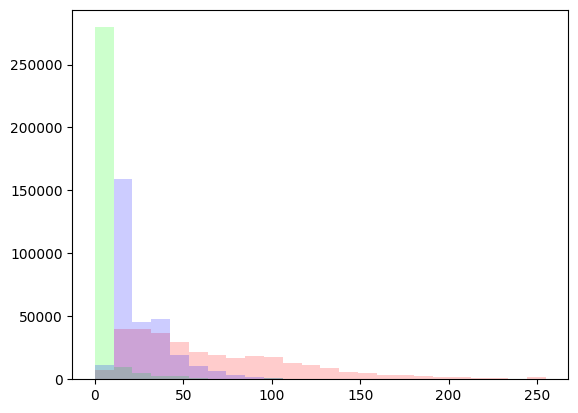

In [26]:
bins=np.linspace(0,255,25)
plt.hist(r.getdata(),alpha=0.2,color='#ff0000',bins=bins)
plt.hist(g.getdata(),alpha=0.2,color='#00ff00',bins=bins)
plt.hist(b.getdata(),alpha=0.2,color='#0000ff',bins=bins)
plt.show()

# More Histograms

(-6296.6, 24000.0)

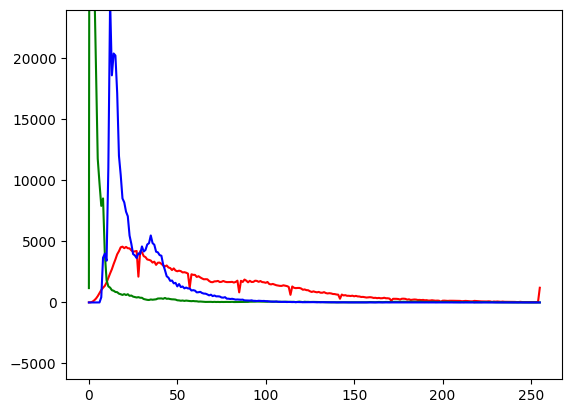

In [27]:
plt.plot(r.histogram(),'r')
plt.plot(g.histogram(),'g')
plt.plot(b.histogram(),'b')
plt.ylim(ymax=24000)

What does the red peak at 255 mean?

# Equalization

Equalization attempts to normalizes the image histogram to create a uniform distribution of grayscale values.  This makes it easier to see differences, but distorts the meaning of the intensities (the transformation is non-linear).

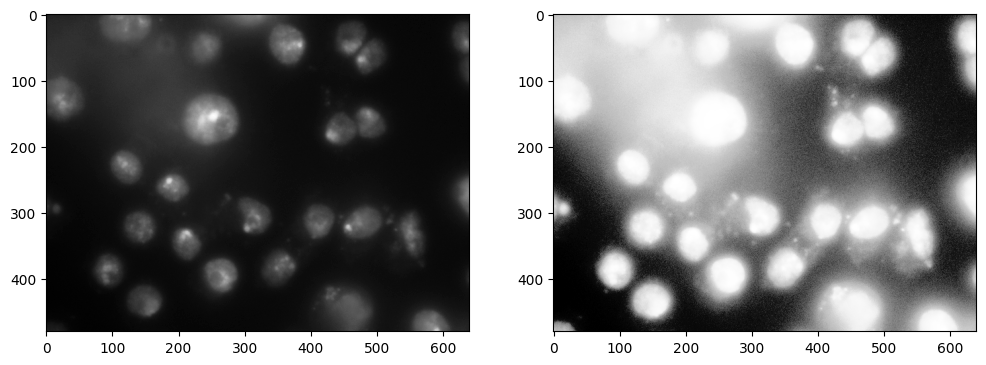

In [28]:
from PIL import ImageOps
beq = ImageOps.equalize(b)
f = plt.figure(figsize=(12,6)); f.add_subplot(1, 2, 1)
plt.imshow(np.array(b),cmap = cm.Greys_r); f.add_subplot(1, 2, 2)
plt.imshow(np.array(beq),cmap = cm.Greys_r); 

# Equalization

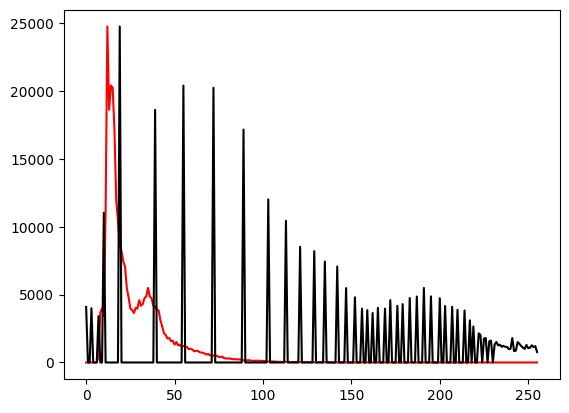

In [29]:
plt.plot(b.histogram(),'r')
plt.plot(beq.histogram(),'k')

# Autocontrast

Maximize (normalize) image contrast. This function calculates a histogram of the input image, removes a cutoff percent of the lightest and darkest pixels from the histogram, and remaps the image so that the darkest remaining pixel becomes black (0), and the lightest becomes white (255).

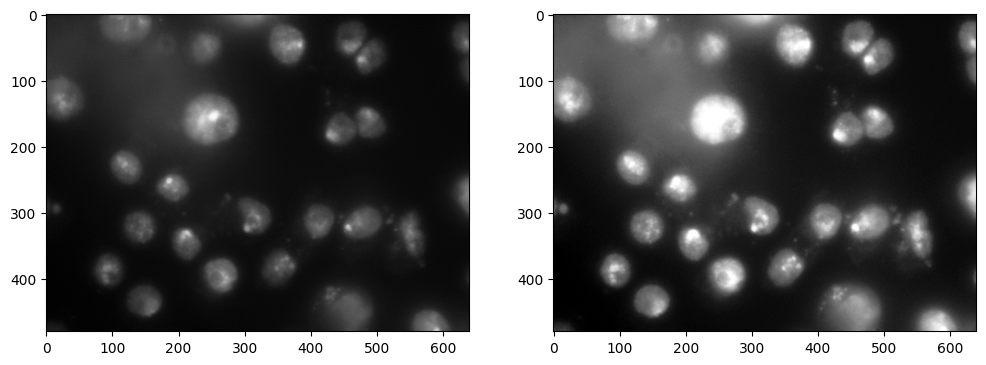

In [30]:
bcon = ImageOps.autocontrast(b,0.5)
f = plt.figure(figsize=(12,6)); f.add_subplot(1, 2, 1)
plt.imshow(np.array(b),cmap = cm.Greys_r); f.add_subplot(1, 2, 2)
plt.imshow(np.array(bcon),cmap = cm.Greys_r);


# Autocontrast

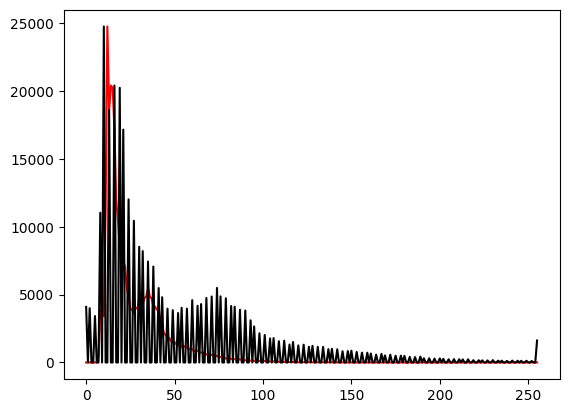

In [31]:
plt.plot(b.histogram(),'r')
plt.plot(bcon.histogram(),'k');

# Thresholding

The `point` function can be used to apply a function to every pixel in the image and return the transformed image.  This makes it easy to threshold images into a mask.

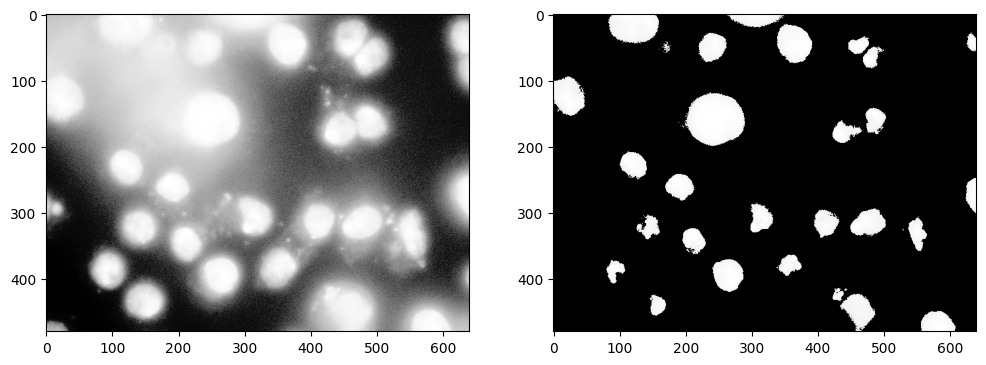

In [32]:
bthresh = beq.point(lambda x: x if x > 225 else 0)
f = plt.figure(figsize=(12,6)); f.add_subplot(1, 2, 1)
plt.imshow(np.array(beq),cmap = cm.Greys_r); f.add_subplot(1, 2, 2)
plt.imshow(np.array(bthresh),cmap = cm.Greys_r) ;

Looking at the thresholded image, any thoughts on how to count the number of cells?

# Project

 * Get the other three images from [http://bits.csb.pitt.edu/images](http://bits.csb.pitt.edu/images)
 * How much green is there in image1 (sum of values)?
 * How much green is there that is co-located with blue > 40? As a percentage? For each image?
 * What if we change the cutoff (40)?
 * Plot the percentage of green co-located with blue for different values of the blue cutoff for each image.
